# Comparison


In [1]:
import pandas as pd
import numpy as np
import os
import pickle

pd.set_option("display.max_columns", None)

In [2]:
from scripts.params import get_params
from scripts.aux_functions import get_all_results_matching, subset_of_columns, clean_modelname

params = get_params()

In [3]:
from scripts.epftoolbox_dm_gw import DM, plot_multivariate_DM_test, GW, plot_multivariate_GW_test

In [4]:
dataroute = params["dataroute"]
resultsroute = params["resultsroute"]
dumproute = params["dumproute"]
graphsroute = params["graphsroute"]
dmroute=params["dmroute"]
gwroute=params["gwroute"]

In [5]:
start_test = params["start_test"]
local_suffix = params["local_suffix"]

In [6]:
name = f'finaldf_test_{params["tablename"]}.pickle'
filename = os.path.join(dataroute, name)
with open(filename, "rb") as handle:
    df_test = pickle.load(handle)
    
df_test.index=pd.to_datetime(df_test.index.copy())

In [7]:
all_forecasts = get_all_results_matching(params["resultsroute"], ["best_forecasts"])
all_residuals = get_all_results_matching(params["resultsroute"], ["best_residuals"])

{'GARCH_BR_^BVSP_aic_best_forecasts.pickle': '..\\results\\BR_^BVSP\\GARCH_BR_^BVSP_aic_best_forecasts.pickle', 'GARCH_BR_^BVSP_bic_best_forecasts.pickle': '..\\results\\BR_^BVSP\\GARCH_BR_^BVSP_bic_best_forecasts.pickle', 'HMM_multiv_BR_^BVSP_aic_best_forecasts.pickle': '..\\results\\BR_^BVSP\\HMM_multiv_BR_^BVSP_aic_best_forecasts.pickle', 'HMM_multiv_BR_^BVSP_bic_best_forecasts.pickle': '..\\results\\BR_^BVSP\\HMM_multiv_BR_^BVSP_bic_best_forecasts.pickle', 'HMM_univ_BR_^BVSP_aic_best_forecasts.pickle': '..\\results\\BR_^BVSP\\HMM_univ_BR_^BVSP_aic_best_forecasts.pickle', 'HMM_univ_BR_^BVSP_bic_best_forecasts.pickle': '..\\results\\BR_^BVSP\\HMM_univ_BR_^BVSP_bic_best_forecasts.pickle', 'HMM_with_vol_BR_^BVSP_aic_best_forecasts.pickle': '..\\results\\BR_^BVSP\\HMM_with_vol_BR_^BVSP_aic_best_forecasts.pickle', 'HMM_with_vol_BR_^BVSP_bic_best_forecasts.pickle': '..\\results\\BR_^BVSP\\HMM_with_vol_BR_^BVSP_bic_best_forecasts.pickle', 'VAR_multiv_BR_^BVSP_aic_best_forecasts.pickle': '.

In [8]:
def get_only_log_rets(dict_with_dfs: dict, stock: str):
    if type(dict_with_dfs[stock]) == pd.Series:
        # univariate models are saved as series
        df = pd.DataFrame(dict_with_dfs[stock])

    else:
        try:
            # multivariate models are saved as dataframes
            df = pd.DataFrame(dict_with_dfs[stock][f"{stock}_log_rets"])
        except:  # TODO: SACAR ESTO! Es un chanchullo pq hay algunas que son guardadas como None
            pass
    return df

In [9]:
def create_df_from_results_dict(results_dict:dict, substring_to_replace:str):
    created_df = pd.DataFrame()

    for name, dir in results_dict.items():
        dict_with_dfs = pd.read_pickle(dir)
        print(name)

        for stock in dict_with_dfs.keys():
            df = get_only_log_rets(dict_with_dfs, stock)

            modelname = clean_modelname(name, substring_to_replace, tablename=params["tablename"])

            df.columns = [modelname + "_" + stock]

            created_df = pd.merge(
                created_df, df, left_index=True, right_index=True, how="outer"
            )

    created_df.index = pd.to_datetime(created_df.index)
    created_df = created_df[created_df.index > start_test]
    return created_df

In [10]:
forecasts_df = create_df_from_results_dict(all_forecasts, "forecasts")

GARCH_BR_^BVSP_aic_best_forecasts.pickle
GARCH_BR_^BVSP_bic_best_forecasts.pickle
HMM_multiv_BR_^BVSP_aic_best_forecasts.pickle
HMM_multiv_BR_^BVSP_bic_best_forecasts.pickle
HMM_univ_BR_^BVSP_aic_best_forecasts.pickle
HMM_univ_BR_^BVSP_bic_best_forecasts.pickle
HMM_with_vol_BR_^BVSP_aic_best_forecasts.pickle
HMM_with_vol_BR_^BVSP_bic_best_forecasts.pickle
VAR_multiv_BR_^BVSP_aic_best_forecasts.pickle
VAR_multiv_BR_^BVSP_bic_best_forecasts.pickle
VAR_with_vol_BR_^BVSP_aic_best_forecasts.pickle
VAR_with_vol_BR_^BVSP_bic_best_forecasts.pickle


In [11]:
forecasts_df = pd.concat([forecasts_df, subset_of_columns(df_test, "log_rets")])

In [12]:
residual_df = create_df_from_results_dict(all_residuals, "residuals")

GARCH_BR_^BVSP_aic_best_residuals.pickle
GARCH_BR_^BVSP_bic_best_residuals.pickle
HMM_multiv_BR_^BVSP_aic_best_residuals.pickle
HMM_multiv_BR_^BVSP_bic_best_residuals.pickle
HMM_univ_BR_^BVSP_aic_best_residuals.pickle
HMM_univ_BR_^BVSP_bic_best_residuals.pickle
HMM_with_vol_BR_^BVSP_aic_best_residuals.pickle
HMM_with_vol_BR_^BVSP_bic_best_residuals.pickle
VAR_multiv_BR_^BVSP_aic_best_residuals.pickle
VAR_multiv_BR_^BVSP_bic_best_residuals.pickle
VAR_with_vol_BR_^BVSP_aic_best_residuals.pickle
VAR_with_vol_BR_^BVSP_bic_best_residuals.pickle


In [13]:
lower_date=pd.to_datetime(params["start_test"])+pd.Timedelta(days=1)
higher_date=pd.to_datetime(params["end_test"])-pd.Timedelta(days=1)
residual_df=residual_df[lower_date:higher_date].copy()
df_test = df_test[lower_date:higher_date].copy()
residual_df.head()

,GARCH_aic_BVSP_USD,GARCH_aic_^BVSP,GARCH_aic_VALE3.SA,GARCH_aic_VALE,GARCH_aic_PETR3.SA,GARCH_aic_PBR,GARCH_aic_EMBR3.SA,GARCH_aic_ERJ,GARCH_aic_ABEV3.SA,GARCH_aic_ABEV,GARCH_bic_BVSP_USD,GARCH_bic_^BVSP,GARCH_bic_VALE3.SA,GARCH_bic_VALE,GARCH_bic_PETR3.SA,GARCH_bic_PBR,GARCH_bic_EMBR3.SA,GARCH_bic_ERJ,GARCH_bic_ABEV3.SA,GARCH_bic_ABEV,HMM_multiv_aic_BVSP_USD,HMM_multiv_aic_^BVSP,HMM_multiv_aic_VALE3.SA,HMM_multiv_aic_VALE,HMM_multiv_aic_PETR3.SA,HMM_multiv_aic_PBR,HMM_multiv_aic_EMBR3.SA,HMM_multiv_aic_ERJ,HMM_multiv_aic_ABEV3.SA,HMM_multiv_aic_ABEV,HMM_multiv_bic_BVSP_USD,HMM_multiv_bic_^BVSP,HMM_multiv_bic_VALE3.SA,HMM_multiv_bic_VALE,HMM_multiv_bic_PETR3.SA,HMM_multiv_bic_PBR,HMM_multiv_bic_EMBR3.SA,HMM_multiv_bic_ERJ,HMM_multiv_bic_ABEV3.SA,HMM_multiv_bic_ABEV,HMM_univ_aic_BVSP_USD,HMM_univ_aic_^BVSP,HMM_univ_aic_VALE3.SA,HMM_univ_aic_VALE,HMM_univ_aic_PETR3.SA,HMM_univ_aic_PBR,HMM_univ_aic_EMBR3.SA,HMM_univ_aic_ERJ,HMM_univ_aic_ABEV3.SA,HMM_univ_aic_ABEV,HMM_univ_bic_BVSP_USD,HMM_univ_bic_^BVSP,HMM_univ_bic_VALE3.SA,HMM_univ_bic_VALE,HMM_univ_bic_PETR3.SA,HMM_univ_bic_PBR,HMM_univ_bic_EMBR3.SA,HMM_univ_bic_ERJ,HMM_univ_bic_ABEV3.SA,HMM_univ_bic_ABEV,HMM_with_vol_aic_BVSP_USD,HMM_with_vol_aic_^BVSP,HMM_with_vol_aic_VALE3.SA,HMM_with_vol_aic_VALE,HMM_with_vol_aic_PETR3.SA,HMM_with_vol_aic_PBR,HMM_with_vol_aic_EMBR3.SA,HMM_with_vol_aic_ERJ,HMM_with_vol_aic_ABEV3.SA,HMM_with_vol_aic_ABEV,HMM_with_vol_bic_BVSP_USD,HMM_with_vol_bic_^BVSP,HMM_with_vol_bic_VALE3.SA,HMM_with_vol_bic_VALE,HMM_with_vol_bic_PETR3.SA,HMM_with_vol_bic_PBR,HMM_with_vol_bic_EMBR3.SA,HMM_with_vol_bic_ERJ,HMM_with_vol_bic_ABEV3.SA,HMM_with_vol_bic_ABEV,VAR_multiv_aic_BVSP_USD,VAR_multiv_aic_^BVSP,VAR_multiv_aic_VALE3.SA,VAR_multiv_aic_VALE,VAR_multiv_aic_PETR3.SA,VAR_multiv_aic_PBR,VAR_multiv_aic_EMBR3.SA,VAR_multiv_aic_ERJ,VAR_multiv_aic_ABEV3.SA,VAR_multiv_aic_ABEV,VAR_multiv_bic_BVSP_USD,VAR_multiv_bic_^BVSP,VAR_multiv_bic_VALE3.SA,VAR_multiv_bic_VALE,VAR_multiv_bic_PETR3.SA,VAR_multiv_bic_PBR,VAR_multiv_bic_EMBR3.SA,VAR_multiv_bic_ERJ,VAR_multiv_bic_ABEV3.SA,VAR_multiv_bic_ABEV,VAR_with_vol_aic_BVSP_USD,VAR_with_vol_aic_^BVSP,VAR_with_vol_aic_VALE3.SA,VAR_with_vol_aic_VALE,VAR_with_vol_aic_PETR3.SA,VAR_with_vol_aic_PBR,VAR_with_vol_aic_EMBR3.SA,VAR_with_vol_aic_ERJ,VAR_with_vol_aic_ABEV3.SA,VAR_with_vol_aic_ABEV,VAR_with_vol_bic_BVSP_USD,VAR_with_vol_bic_^BVSP,VAR_with_vol_bic_VALE3.SA,VAR_with_vol_bic_VALE,VAR_with_vol_bic_PETR3.SA,VAR_with_vol_bic_PBR,VAR_with_vol_bic_EMBR3.SA,VAR_with_vol_bic_ERJ,VAR_with_vol_bic_ABEV3.SA,VAR_with_vol_bic_ABEV
2023-06-01,0.026560,0.019043,0.021137,0.028546,0.027116,0.034391,0.018999,0.036980,-0.012154,0.010322,0.026719,0.018774,0.021158,0.028853,0.027116,0.034391,0.018999,0.036980,-0.012154,0.009812,0.029724,0.020355,0.021044,0.027485,0.028798,0.036867,0.022362,0.041568,-0.011787,0.010655,0.030266,0.019265,0.020489,0.027847,0.028182,0.037747,0.021649,0.040175,-0.010095,0.010832,0.030490,0.021200,0.021939,0.028140,0.027027,0.035455,0.019997,0.038099,-0.011928,0.010455,0.030490,0.020473,0.021975,0.028250,0.027027,0.035455,0.019997,0.038099,-0.011878,0.010449,0.030220,0.017483,0.017478,0.024126,0.027593,0.030706,0.019868,0.038552,-0.010622,0.008446,0.027822,0.020244,0.017681,0.024585,0.024941,0.035263,0.021518,0.039439,-0.012207,0.010308,-0.006128,-0.007375,-0.004695,-0.007141,-0.018857,-0.023360,0.003867,-0.005980,-0.010203,-0.023118,-0.004092,-0.006800,-0.008214,-0.004970,-0.017764,-0.021952,0.003692,-0.007432,-0.004901,-0.013800,-0.006522,-0.008154,-0.008680,-0.012543,-0.009163,-0.013024,0.004523,-0.001870,-0.006891,-0.013985,-0.003865,-0.007229,-0.008111,-0.009569,-0.010697,-0.016144,0.006869,0.002302,-0.006959,-0.011648
2023-06-02,0.026744,0.016491,0.041043,0.047116,0.010069,0.018850,-0.000707,0.006428,0.015134,0.027602,0.026933,0.016639,0.040570,0.047864,0.010069,0.018850,-0.000707,0.006428,0.015134,0.025646,0.031072,0.017857,0.041842,0.047697,0.012051,0.020893,0.002335,0.008995,0.015225,0.027720,0.031005,0.017

In [14]:
# estadisticos de nans
((residual_df.isna().sum(axis=0) / len(residual_df.index)) * 100).nlargest(10)

GARCH_aic_BVSP_USD    0.0
GARCH_aic_^BVSP       0.0
GARCH_aic_VALE3.SA    0.0
GARCH_aic_VALE        0.0
GARCH_aic_PETR3.SA    0.0
GARCH_aic_PBR         0.0
GARCH_aic_EMBR3.SA    0.0
GARCH_aic_ERJ         0.0
GARCH_aic_ABEV3.SA    0.0
GARCH_aic_ABEV        0.0
dtype: float64

In [15]:
# estadisticos de nans
((forecasts_df.isna().sum(axis=0) / len(forecasts_df.index)) * 100).nlargest(10)

GARCH_aic_BVSP_USD    50.649351
GARCH_aic_^BVSP       50.649351
GARCH_aic_VALE3.SA    50.649351
GARCH_aic_VALE        50.649351
GARCH_aic_PETR3.SA    50.649351
GARCH_aic_PBR         50.649351
GARCH_aic_EMBR3.SA    50.649351
GARCH_aic_ERJ         50.649351
GARCH_aic_ABEV3.SA    50.649351
GARCH_aic_ABEV        50.649351
dtype: float64

## Separating in different stocks

In [16]:
def separate_by_stock(df:pd.DataFrame):
     stock_dict={}

     for stock in params["tickerlist"]:
          if params["local_suffix"] in stock:
               stock_dict[stock]= subset_of_columns(residual_df, stock)
          else:
               stock_dict[stock]= subset_of_columns(residual_df, stock, params["local_suffix"])    
     
     return stock_dict      

In [17]:
forecasts_by_stock=separate_by_stock(forecasts_df)
residuals_by_stock=separate_by_stock(residual_df)

In [18]:
for df_clean, name in zip([forecasts_by_stock, residuals_by_stock], ["forecasts", "residuals"]):
    bystockname = name + "_by_stock_" + params["tablename"] + ".pickle"
    with open(os.path.join(resultsroute, bystockname), "wb") as handle:
        pickle.dump(df_clean, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [19]:
def delete_in_column_names(df:pd.DataFrame, string:str):
    new_cols=[]
    for col in df.columns:
        col=col.replace(string, "")
        new_cols.append(col)
    df=df.set_axis(labels=new_cols, axis=1)
    return df

^BVSP


c:\Users\alfredo.sampron\Documents\GitHub\regime-switching-hmm\notebooks\scripts\epftoolbox_dm_gw.py:108: RuntimeWarning: divide by zero encountered in scalar divide
  DM_stat = mean_d / np.sqrt((1 / N) * var_d)


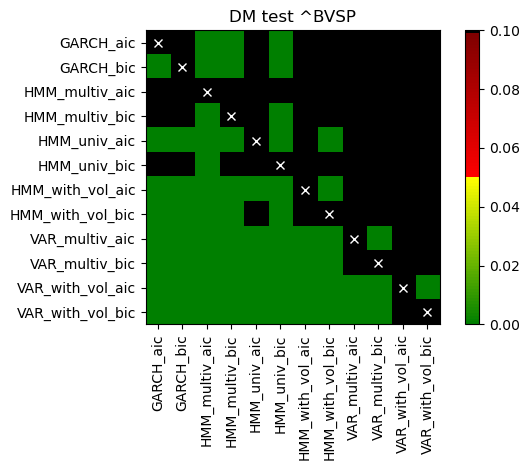

VALE3.SA


c:\Users\alfredo.sampron\Documents\GitHub\regime-switching-hmm\notebooks\scripts\epftoolbox_dm_gw.py:108: RuntimeWarning: divide by zero encountered in scalar divide
  DM_stat = mean_d / np.sqrt((1 / N) * var_d)


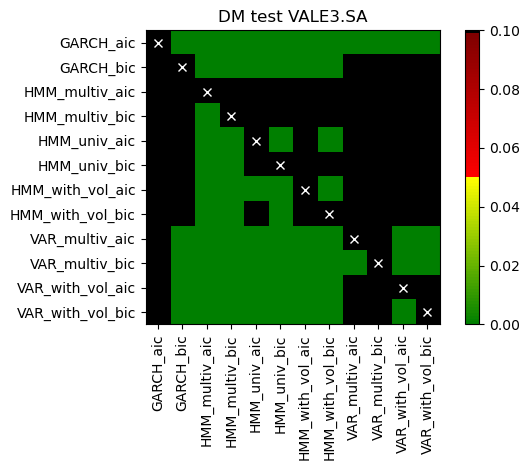

VALE


c:\Users\alfredo.sampron\Documents\GitHub\regime-switching-hmm\notebooks\scripts\epftoolbox_dm_gw.py:108: RuntimeWarning: divide by zero encountered in scalar divide
  DM_stat = mean_d / np.sqrt((1 / N) * var_d)


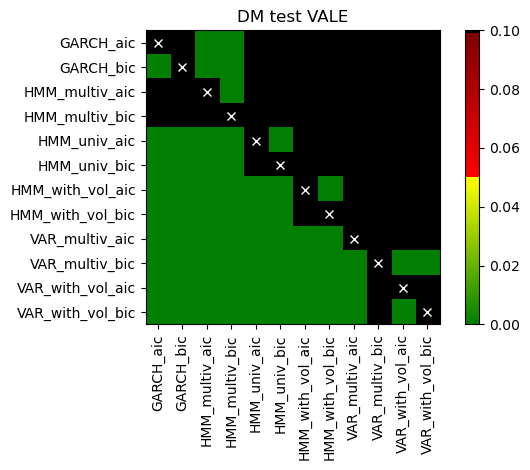

PETR3.SA


c:\Users\alfredo.sampron\Documents\GitHub\regime-switching-hmm\notebooks\scripts\epftoolbox_dm_gw.py:108: RuntimeWarning: invalid value encountered in scalar divide
  DM_stat = mean_d / np.sqrt((1 / N) * var_d)
c:\Users\alfredo.sampron\Documents\GitHub\regime-switching-hmm\notebooks\scripts\epftoolbox_dm_gw.py:108: RuntimeWarning: divide by zero encountered in scalar divide
  DM_stat = mean_d / np.sqrt((1 / N) * var_d)


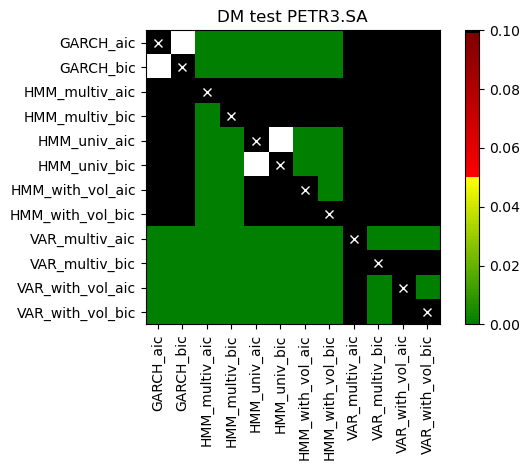

PBR


c:\Users\alfredo.sampron\Documents\GitHub\regime-switching-hmm\notebooks\scripts\epftoolbox_dm_gw.py:108: RuntimeWarning: invalid value encountered in scalar divide
  DM_stat = mean_d / np.sqrt((1 / N) * var_d)
c:\Users\alfredo.sampron\Documents\GitHub\regime-switching-hmm\notebooks\scripts\epftoolbox_dm_gw.py:108: RuntimeWarning: divide by zero encountered in scalar divide
  DM_stat = mean_d / np.sqrt((1 / N) * var_d)


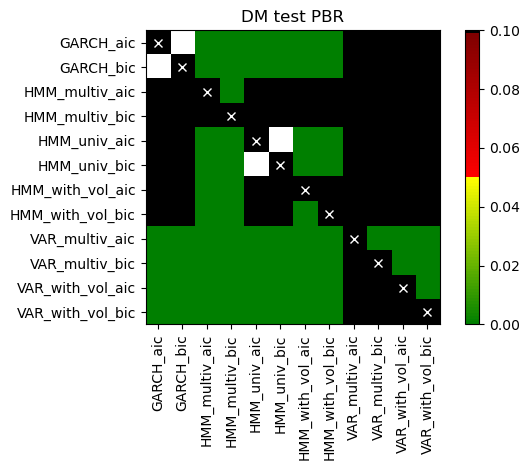

EMBR3.SA


c:\Users\alfredo.sampron\Documents\GitHub\regime-switching-hmm\notebooks\scripts\epftoolbox_dm_gw.py:108: RuntimeWarning: invalid value encountered in scalar divide
  DM_stat = mean_d / np.sqrt((1 / N) * var_d)
c:\Users\alfredo.sampron\Documents\GitHub\regime-switching-hmm\notebooks\scripts\epftoolbox_dm_gw.py:108: RuntimeWarning: divide by zero encountered in scalar divide
  DM_stat = mean_d / np.sqrt((1 / N) * var_d)


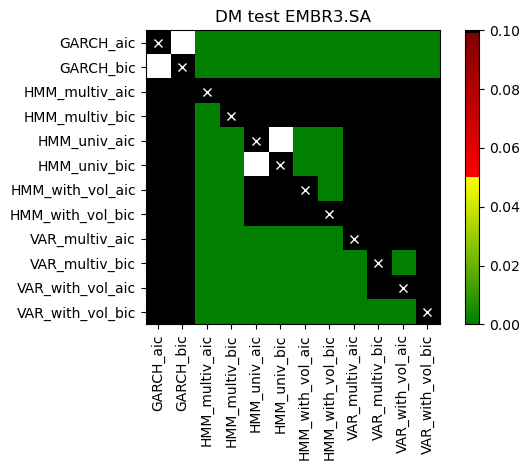

ERJ


c:\Users\alfredo.sampron\Documents\GitHub\regime-switching-hmm\notebooks\scripts\epftoolbox_dm_gw.py:108: RuntimeWarning: invalid value encountered in scalar divide
  DM_stat = mean_d / np.sqrt((1 / N) * var_d)
c:\Users\alfredo.sampron\Documents\GitHub\regime-switching-hmm\notebooks\scripts\epftoolbox_dm_gw.py:108: RuntimeWarning: divide by zero encountered in scalar divide
  DM_stat = mean_d / np.sqrt((1 / N) * var_d)


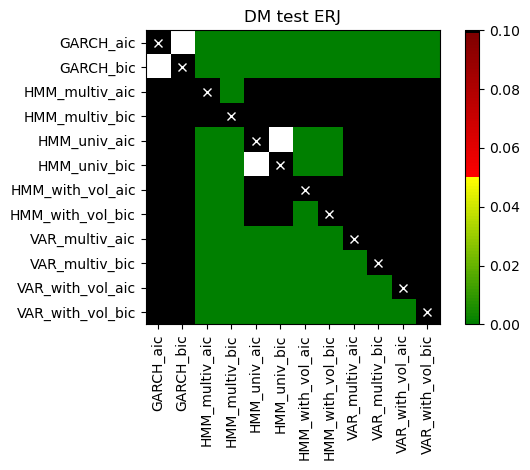

ABEV3.SA


c:\Users\alfredo.sampron\Documents\GitHub\regime-switching-hmm\notebooks\scripts\epftoolbox_dm_gw.py:108: RuntimeWarning: invalid value encountered in scalar divide
  DM_stat = mean_d / np.sqrt((1 / N) * var_d)
c:\Users\alfredo.sampron\Documents\GitHub\regime-switching-hmm\notebooks\scripts\epftoolbox_dm_gw.py:108: RuntimeWarning: divide by zero encountered in scalar divide
  DM_stat = mean_d / np.sqrt((1 / N) * var_d)


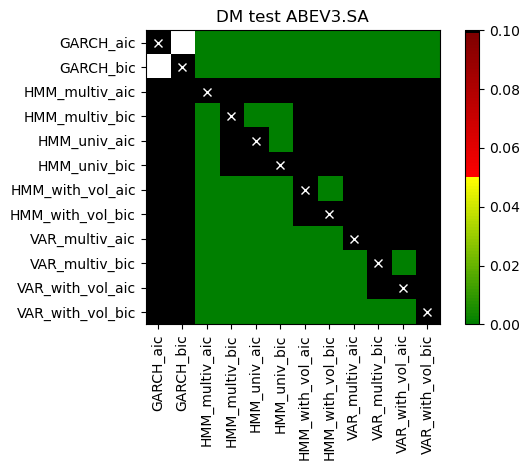

ABEV


c:\Users\alfredo.sampron\Documents\GitHub\regime-switching-hmm\notebooks\scripts\epftoolbox_dm_gw.py:108: RuntimeWarning: divide by zero encountered in scalar divide
  DM_stat = mean_d / np.sqrt((1 / N) * var_d)


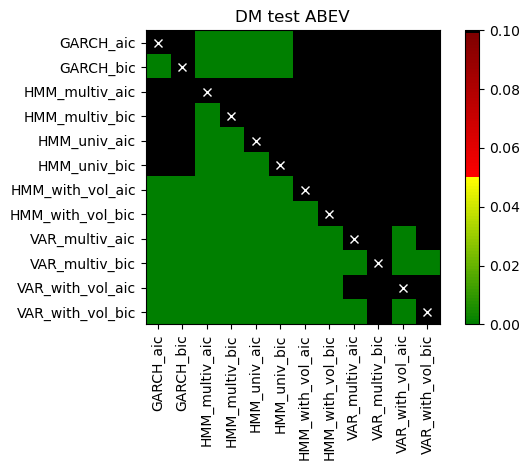

In [20]:
for stock in forecasts_by_stock.keys():
    print(stock)
    real_values=subset_of_columns(df_test, f"{stock}_log_rets")
    forecasts=delete_in_column_names(forecasts_by_stock[stock].fillna(0), f"_{stock}")   

    plot_multivariate_DM_test(real_price=real_values, 
                            forecasts=forecasts.fillna(0), 
                            title=f"DM test {stock}",
                            savefig=True,
                            path=dmroute)

In [21]:
best_models_by_stock={stock:None for stock in residuals_by_stock.keys()}

for stock, dataframe in residuals_by_stock.items():
    dataframe = delete_in_column_names(dataframe, f"_{stock}")
    metrics_df = pd.DataFrame(index=["mse", "meanabs", "medianabs"])

    for column in dataframe.columns:
        single_model=pd.DataFrame(dataframe[column])
        
        metrics_df.loc["mse", column] = (
            (single_model**2).mean().mean()
        )
        metrics_df.loc["meanabs", column] = (
            single_model.abs().mean().mean()
        )
        metrics_df.loc["medianabs", column] = (
            (single_model.abs()).median().median()
        )
    metrics_df = metrics_df * 100
    metrics_df = subset_of_columns(metrics_df, substring="", exclude="USD")
    
    best_dict={}
    for criterion in metrics_df.index:
        best_dict[criterion] = metrics_df.iloc[metrics_df.index==criterion].idxmin(axis="columns").values[0]
        
    best_models_by_stock[stock]= (metrics_df, best_dict)

In [22]:
print(params["tickerlist"][0])
best_models_by_stock[params["tickerlist"][0]][1]

^BVSP


{'mse': 'HMM_with_vol_aic',
 'meanabs': 'HMM_with_vol_aic',
 'medianabs': 'HMM_with_vol_bic'}

In [23]:
best_models_by_stock[params["tickerlist"][0]][0]

,GARCH_aic,GARCH_bic,HMM_multiv_aic,HMM_multiv_bic,HMM_univ_aic,HMM_univ_bic,HMM_with_vol_aic,HMM_with_vol_bic,VAR_multiv_aic,VAR_multiv_bic,VAR_with_vol_aic,VAR_with_vol_bic
mse,0.008646,0.008640,0.009425,0.008684,0.009207,0.009392,0.007715,0.007895,0.008761,0.009412,0.009295,0.009278
meanabs,0.755515,0.755869,0.788401,0.749582,0.779227,0.785640,0.706522,0.710375,0.773244,0.789355,0.796535,0.792702
medianabs,0.642359,0.640078,0.665597,0.631355,0.633541,0.662488,0.599198,0.587733,0.693651,0.633645,0.701303,0.712395


In [24]:
best_models_by_stock[params["tickerlist"][0]][0].rank(axis=1)

,GARCH_aic,GARCH_bic,HMM_multiv_aic,HMM_multiv_bic,HMM_univ_aic,HMM_univ_bic,HMM_with_vol_aic,HMM_with_vol_bic,VAR_multiv_aic,VAR_multiv_bic,VAR_with_vol_aic,VAR_with_vol_bic
mse,4.0,3.0,12.0,5.0,7.0,10.0,1.0,2.0,6.0,11.0,9.0,8.0
meanabs,4.0,5.0,9.0,3.0,7.0,8.0,1.0,2.0,6.0,10.0,12.0,11.0
medianabs,7.0,6.0,9.0,3.0,4.0,8.0,2.0,1.0,10.0,5.0,11.0,12.0


In [37]:
agg_df=(pd.DataFrame().reindex_like(best_models_by_stock[params["tickerlist"][0]][0]))

for asset in params["tickerlist"]:
    ranks = best_models_by_stock[asset][0].rank(axis=1)
    agg_df = agg_df.add(ranks, fill_value=0)
agg_df = agg_df/len(params["tickerlist"])
    
agg_df.rank(axis=1, method="average").astype(int)

,GARCH_aic,GARCH_bic,HMM_multiv_aic,HMM_multiv_bic,HMM_univ_aic,HMM_univ_bic,HMM_with_vol_aic,HMM_with_vol_bic,VAR_multiv_aic,VAR_multiv_bic,VAR_with_vol_aic,VAR_with_vol_bic
mse,11,9,12,7,5,6,2,1,3,10,4,8
meanabs,11,10,8,6,5,7,1,2,3,12,4,8
medianabs,3,5,4,8,6,7,2,1,11,10,9,12


In [26]:
agg_df.to_csv(os.path.join(resultsroute, f"""aggregate_results_df_{params["tablename"]}.csv"""))

In [27]:
criterion="mse"
print(f"Best overall performance by {criterion}")
agg_df.T.nsmallest(3, f"{criterion}").index.to_list()

Best overall performance by mse


['HMM_with_vol_bic', 'HMM_with_vol_aic', 'VAR_multiv_aic']